# 단순참조

- 일반적으로 이루어지는 b=a와 같은 파이썬의 할당 연산문은 객체에 대한 참조가 생성되는 단순 참조문

In [1]:
a=[1,2,3]

In [2]:
b=a

In [3]:
b.append(4)

In [4]:
a

[1, 2, 3, 4]

In [5]:
b

[1, 2, 3, 4]

In [6]:
print(id(a),id(b))

2112248261184 2112248261184


- 단순 참조문이어서, 단순히
- a->[,,]--->[1] [2] [3] 이 객체를 가리키는데 b도 단순히 a가 가리키는걸 똑같이 가리킨다. 이것은 효율성 때문에 이렇게 되는 것이다.
- 참조가 이루어지는 것이고, 사본을 만들지 않는다.
- b를 이용해서 a가 참조하는 객체를 수정한다.
- 즉, 참조하는 것은 mutuablity를 유지시킴

# Shallow Copy

In [9]:
a=[1,2,3]

In [10]:
b=a[:] # 얕은 복사 shallow copy

- 이 케이스는 새로운 배열을 만들고, a가 가리키는 배열이 참조하는 객체를 참조하게 된다.

In [11]:
b.append(4)

In [12]:
a

[1, 2, 3]

In [13]:
b

[1, 2, 3, 4]

In [14]:
print(a)

[1, 2, 3]


In [15]:
print(b)

[1, 2, 3, 4]


- 이전의 단순 참조와는 다르게, "새로운 객체"를 만들어서 a가 가리키는 값을 참조하는 것이기 때문에 b가 가리키는 새로운 객체인 배열을 바꾼다고 a의 값이 변경되지 않는다.

In [16]:
b[0]=5

In [17]:
print(a)
print(b)

[1, 2, 3]
[5, 2, 3, 4]


- 즉, 얕은 복사는 단순 참조와는 다르게 새로운 객체를 생성시키는 것이다.

In [18]:
print(id(a),id(b))

2112247384128 2112248260672


## Shallow Copy와 2차원리스트의 초기화

# 깊은 복사 vs 얕은 복사

- 얕은 복사와 깊은 복사의 차이점은 리스트나 클래스의 인스턴스와 같은 복합 객체에 대해서만 적용됨
    - 얕은 복사는 새 복합 객체를 만들고 원본 객체 내에 있는 오브젝트에 대한 참조를 삽입
    - 깊은 복사는 새 복합 객체를 만들고 원본 객체 내에 있는 객체에 대한 복사를 재귀적으로 삽입
        - 2차원 3차원 리스트 만든다 치면, 그 모든 리스트에 대해서 원본 객체에 대한 참조를 만들어 주는 것


- 깊은복사는 copy 모듈의 deepcopy() 함수를 통해서 수행한다.
    - b=copy.deepcopy(a)
- 깊은 복사를 히게되면 얕은 복사에서 할 수 없는 연산이 가능
    - 재귀적 객체(자신에 대한 직, 간접 참조 포함된 복합 객체)에 대한 참조는 재귀 루프에 빠질 수 있다.
    - 깊은 복사를 하면 두 복사본이 공유하려고 한 데이터에 대해서도 너무 많은 복사가 가능하다.

In [82]:
from IPython.display import Image

In [103]:
a=[[1,2],[3,4]]

In [104]:
a[0]

[1, 2]

In [105]:
a[1]

[3, 4]

In [106]:
b=a

In [107]:
print(b[0],b[1])

[1, 2] [3, 4]


In [108]:
print(id(a),id(b))# 단순 참조를 하였을때는 a와 b의 id가 서로 같음

2112251347584 2112251347584


In [109]:
print(id(a[0]),id(b[0]))
print(id(a[1]),id(b[1]))# 당연하지만 단순 참조니까 아예 동일함

2112273481472 2112273481472
2112273548288 2112273548288


## 얕은복사

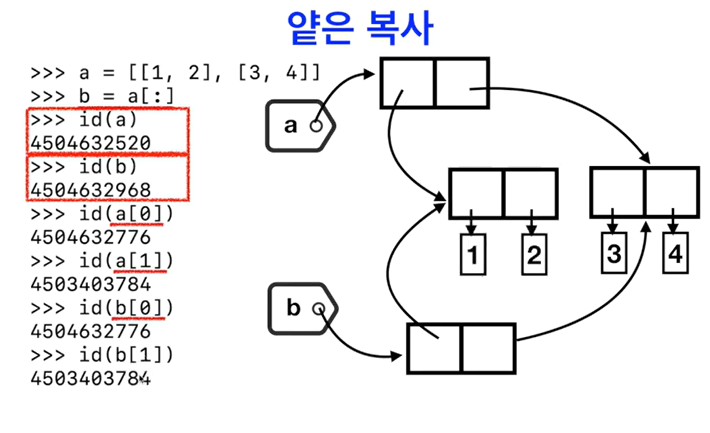

In [110]:
Image("Shallow_Copy.png")

In [111]:
b=a[:] # 얕은 복사

In [112]:
a[0]=[10,20]

In [113]:
a

[[10, 20], [3, 4]]

In [114]:
b

[[1, 2], [3, 4]]

In [115]:
print(id(a[0]),id(b[0]))
print(id(a[1]),id(b[1]))

2112247894400 2112273481472
2112273548288 2112273548288


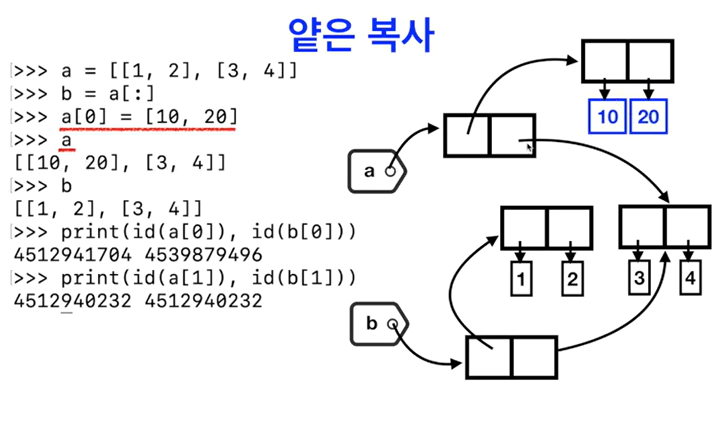

In [116]:
Image("Shallow copy.png")

In [146]:
a=[[1,2],[3,4]]

In [147]:
b=a[:]

In [148]:
a[0][0]=8

In [149]:
a

[[8, 2], [3, 4]]

In [150]:
b

[[8, 2], [3, 4]]

In [151]:
print(id(a),id(b))
print(id(a[0]),id(b[0]))
print(id(a[0][0]),id(b[0][0]))

2112273408768 2112273021184
2112247894080 2112247894080
2112192709072 2112192709072


- 위와 같이 shallow copy는 가장 상위단의 참조는 바꾸지만,
- 그 상위단에서 가리키는 각각의 객체는 일단은 같은 것을 참조함.
- 그래서 [1,2], [3,4] 이것은 각각 생성된 건 맞지만, [1,2]와 [3,4]가 현 시점에서 가리키는 건 같다는 것.
    - 그 결과 [][] 레벨에서 바꾸면, a따라서 b도 바뀌게 되는 것임

In [152]:
a[0]=[10,20]

In [157]:
print(id(a[0]),id(b[0]))

2112273559360 2112247894080


In [158]:
print(id(a[1]),id(b[1]))

2112251357504 2112251357504


- 반면 위와 같이 a[0] 즉, [1,2]를 통으로 바꾼 경우 라면, 그 때가서는 참조를 바꾸라는 의미이므로 id가 다르게 나옴

## 깊은복사

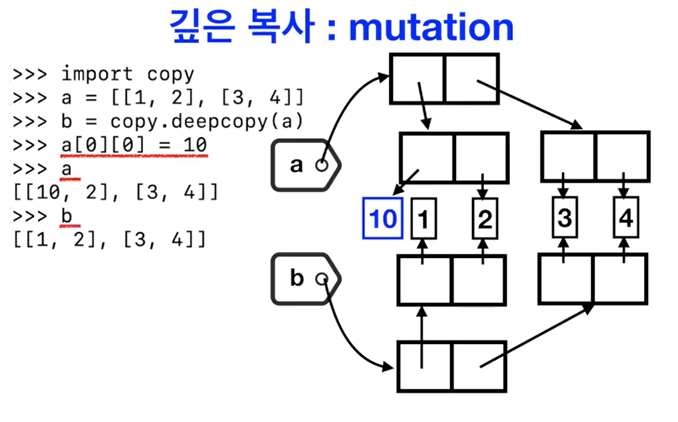

In [159]:
Image("Deepcopy.png")

In [160]:
import copy

In [161]:
a=[[1,2],[3,4]]

In [162]:
b=copy.deepcopy(a) # 모든객체에 대한 참조를 생성

In [163]:
b

[[1, 2], [3, 4]]

In [164]:
a[0][0]=10

In [165]:
a

[[10, 2], [3, 4]]

In [166]:
b

[[1, 2], [3, 4]]

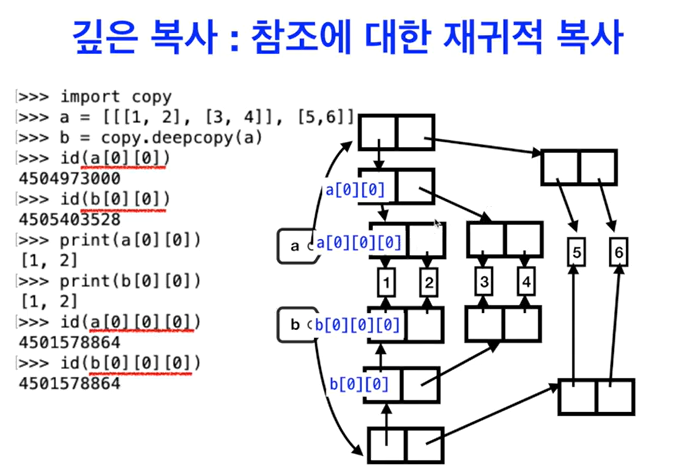

In [167]:
Image("Deepcopy1.png")

- 그림에서 볼 수 있는 것과 같이 모두 다름!
- 쉽게 말해서 내부의 객체들까지 완전 새롭게 copy 되는 것

# 2차원 배열 초기화

## Bad example

In [168]:
arr=[[False]*2]*5

arr[0][0] 만 정확하게 True로 바꾸고 싶다.

In [169]:
arr[0][0]=True

In [170]:
arr

[[True, False], [True, False], [True, False], [True, False], [True, False]]

- 왜 이런 이상한 결과가 나왔을까?
    - 배열 선언시에 우리가 선언한 참조 객체는 [] 단 하나이다.
    - 실제로 id를 출력해보면 아래와 같다.

In [173]:
print(id(arr[0]),id(arr[1]),id(arr[2]),id(arr[3]),id(arr[4]))

2112273529024 2112273529024 2112273529024 2112273529024 2112273529024


- 일단 arr이 참조하는 것은 가장 최외곽의 리스트다.
- 여기서 바로 생각해 봐야 하는 것이, arr이 []*5 즉, 5개의 []를 모두 참조할 수 있는가 이 내용인데 당연히 그렇지 않을 것이다. 그러면 여기에서 []*5 이렇게 선언은 했는데 정작 가리키는건 하나가 될 것이라는 예상이 가능하다.
- 다음으로 [False]*2 이거가 문제가 된다.이 [False]라는 내부 리스트도 메모리 상의 어떤 값을 참조하게 될 것이다. 

In [181]:
arr=[[False]*2]*5

In [182]:
arr[0][1]="True"

In [183]:
arr

[[False, 'True'],
 [False, 'True'],
 [False, 'True'],
 [False, 'True'],
 [False, 'True']]

In [185]:
print(id(arr[0][0]),id(arr[1][0]))
print(id(arr[0][1]),id(arr[1][1]))

140722348575624 140722348575624
2112193349808 2112193349808


- 앞에서 예상한것처럼 [Flase]*2도 외곽리스트 []*5 와 마찬가지로 가리키는건 결국 동일 지점이 되는 것이다.

In [191]:
arr=[[False]*2]*5

In [192]:
print(id(arr[0]),id(arr[1]),id(arr[2]),id(arr[3]),id(arr[4]))
print(id(arr))

2112273517120 2112273517120 2112273517120 2112273517120 2112273517120
2112274378816


In [193]:
arr[1]=["True","True"]

In [194]:
arr

[[False, False],
 ['True', 'True'],
 [False, False],
 [False, False],
 [False, False]]

In [195]:
print(id(arr[0]),id(arr[1]),id(arr[2]),id(arr[3]),id(arr[4]))
print(id(arr))

2112273517120 2112273411904 2112273517120 2112273517120 2112273517120
2112274378816


# Conclusion

- 지금까지 공부한게 완벽하다곤 할 수 없겠지만, 리스트에 대해 * 연산자라고 하는 것은, 단순히 메모리 상의 어떤 공간을 늘릴 뿐이다. 이것이 주소를 변경하는 일은 결단코 없다.왜냐하면 그냥 주소를 5번 복사하라는 뜻이기 때문이다.

- 처음 False에서 [False]*2 역시도 그냥 주소 늘리기에 불과하다.

In [196]:
k=[False]*2

In [197]:
k

[False, False]

In [198]:
id(k[0])

140722348575624

In [199]:
id(k[1])

140722348575624

- 이걸 보면 확실히 그냥 주소 자체를 늘렸다고 할 수 있다.

In [200]:
id(k)

2112272903680

- k는 처음에 만들어진 그냥 바로 그 리스트를 k가 reuse 할 목적으로 다른 것을 reference 하지 않는 이상 그대로 유지된다.

- 다만 이 복사된 k[0], k[1]에 대해서는 이것이 각각 새로운 무언가를 참조할 수 있다.

In [202]:
k[1]="what"

In [203]:
print(k)
print(id(k),id(k[0]),id(k[1]))

[False, 'what']
2112272903680 140722348575624 2112203340144


- 다시 말하자면, 우리가 *연산자를 통해서 배열 복사를 해준 의미는, arr이라는 reference가 가리키는 건 항상 같지만, 그 내부에 있는 arr[0], arr[1], arr[2], arr[3], arr[4] 와 같은 공간을 할당함으로서, 각각의 공간들이 새로운 객체를 참조할 수 있도록 하는 의미가 있는 것이다.

- arr=[[False]**2]**5
    - 본론으로 돌아와서 왜 이게 문제가 되는가
    - 일단, arr[0],arr[1],arr[2],arr[3],arr[4] 이것이 모두 다른 것을 참조할 수 있다는 것, 여기까지는 사실이다.
    - 단, [False]*2라는 것은, [False]라는 리스트 객체가 가리킬 수 있는 공간을 하나 더 늘린 것에 불과하다.
    - 그 결과 a[0][0]="True" 이런 것을 선언해 버린다면?
        - arr[0] 니까 [False]*2를 가리킨 것 까지는 맞는데
        - 처음에는 그 arr[0],arr[1],arr[2],arr[3],arr[4] 들이 가리키는게 모두 같아서 arr[0][0]=x나 arr[0][1]=y와 같은 행동은, 
        arr[0],arr[1],arr[2],arr[3],arr[4]가 공통으로 가리키는 무언가의 첫번째 또는 두번째 값을 바꾼다는 뜻이므로 2차원 리스트 초기화 시에 이런 식으로 선언하면 안된다는 뜻이다.

- 올바르게 선언하려면?

In [206]:
m=4
n=3
array=[[0]*m for _ in range(n)]
print(array)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


- 각각 생성된 
    - [0,0,0,0] 0호
    - [0,0,0,0] 1호
    - [0,0,0,0] 2호
    0호, 1호 2호 끼리는 곱하기 연산을 통해 생성된게 아니라는 것, 이게 중요하다.

In [207]:
print(id(array[0]),id(array[1]),id(array[2]))

2112274767168 2112274833280 2112274774080


- 이렇게 id가 다르기 때문에 각각 하나씩 접근이 가능한 것이다.
    - 2차원 리스트 선언시에 반드시 위와 같은 방식을 지향하도록 한다.

# Reference
- https://www.youtube.com/watch?v=RJqvaj8MI_o
- https://yangtaeyoung.github.io/docs/python/2d-array-caution/
- 이것이 코딩테스트다 with python